In [2]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
upload=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [4]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.corr()

<ipython-input-5-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
data=pd.get_dummies(data,columns=['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


<Axes: >

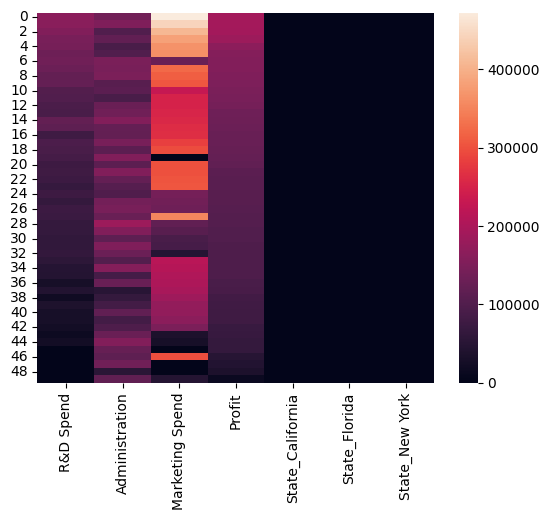

In [7]:
import seaborn as sns
sns.heatmap(data=data)

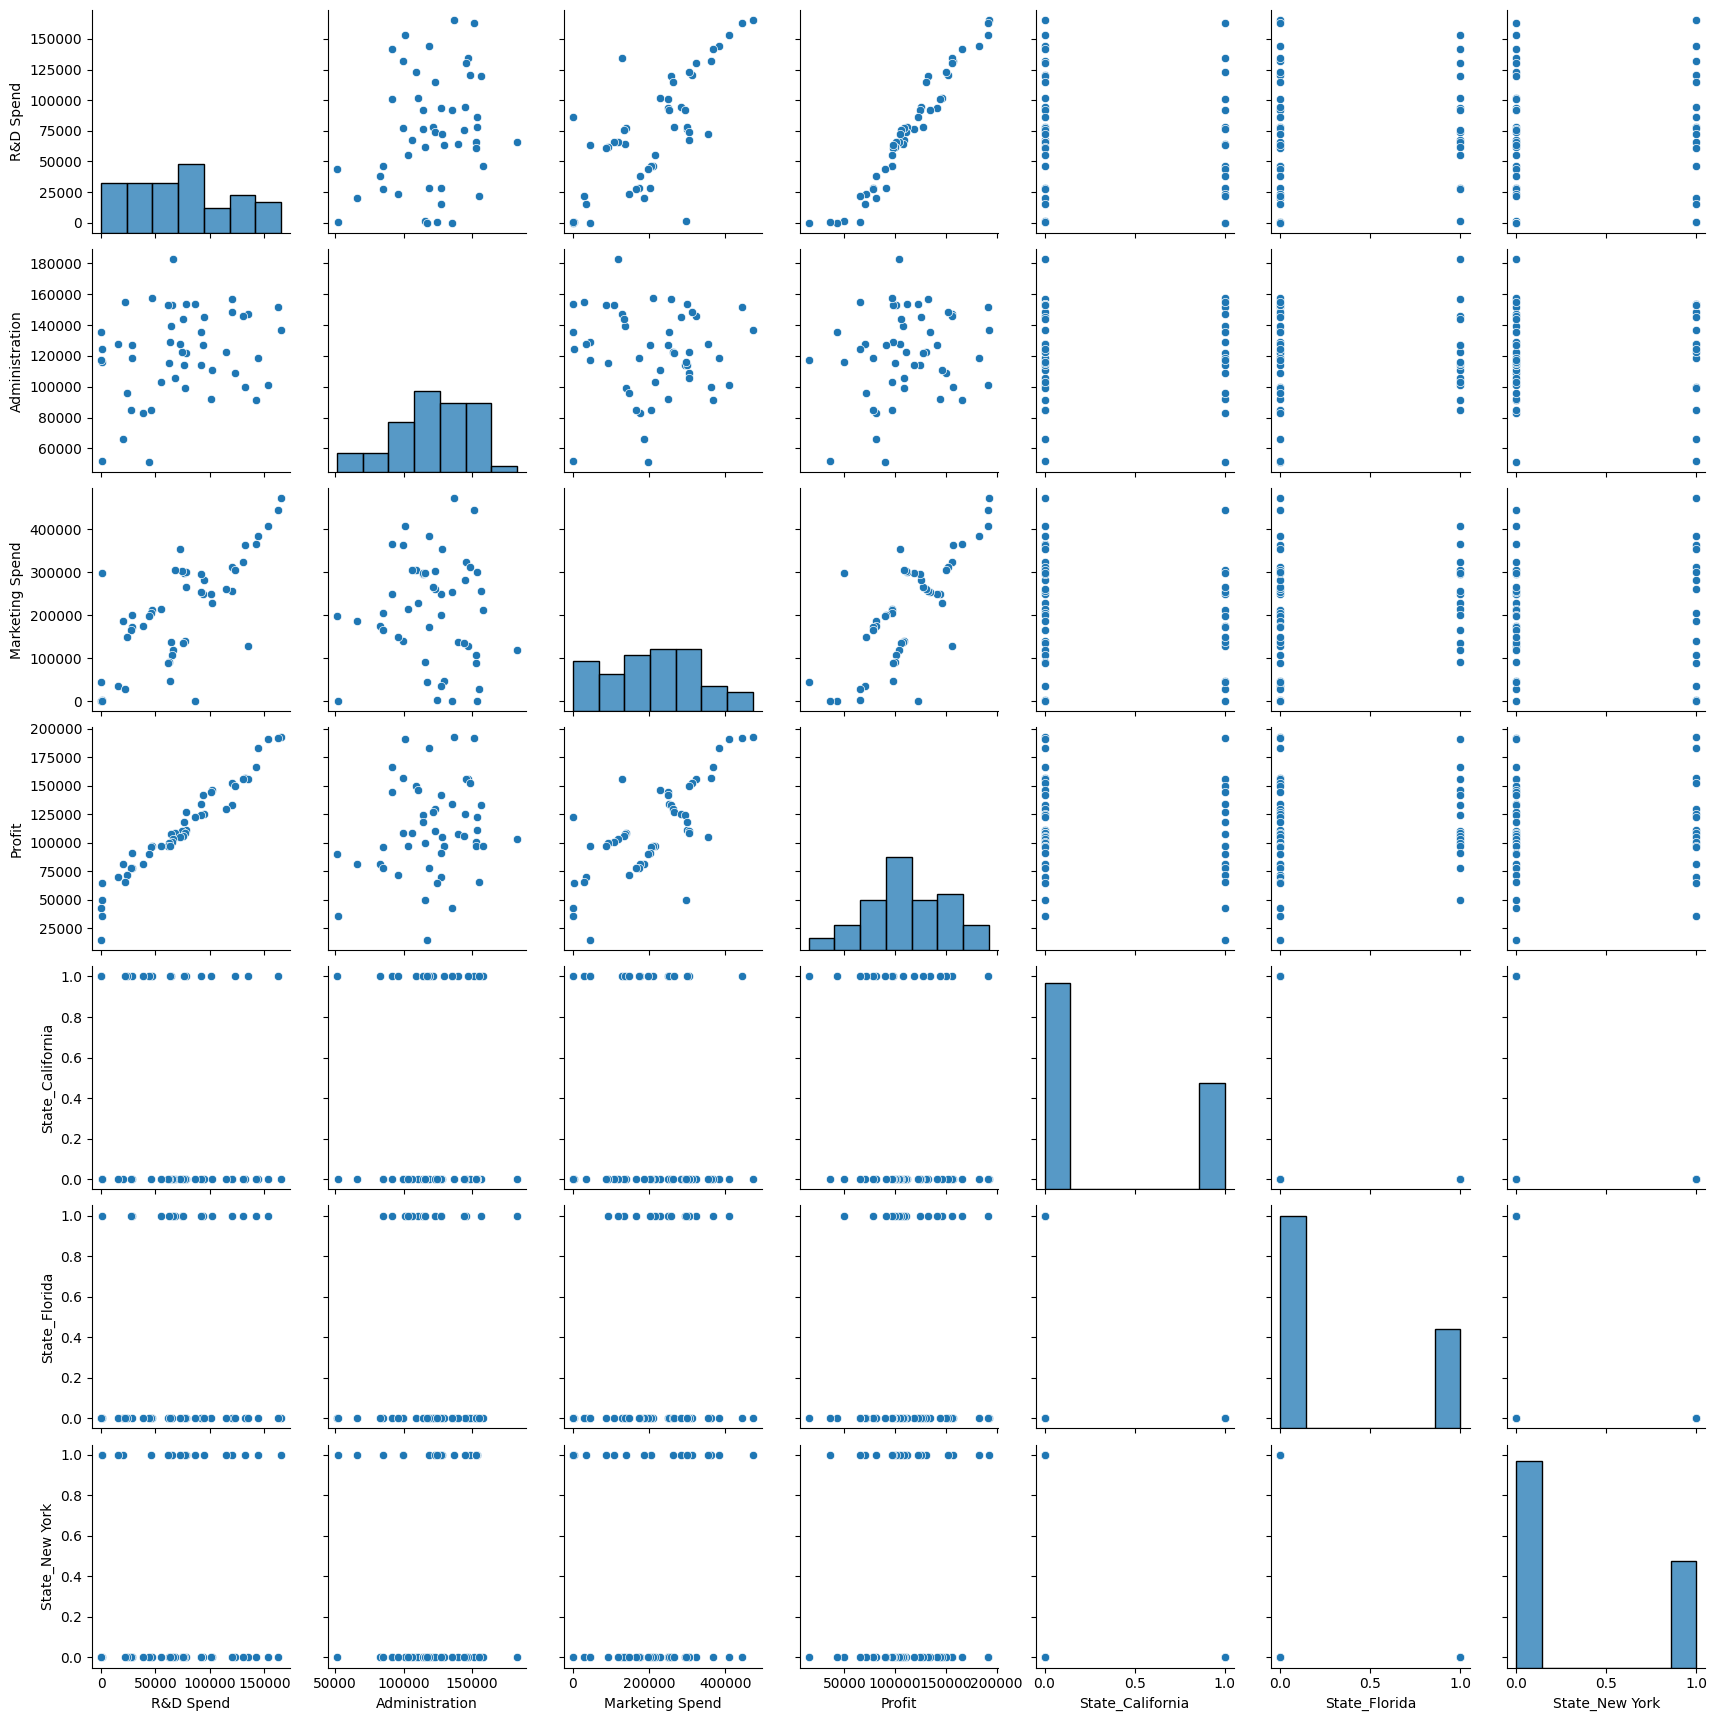

In [8]:
sns.pairplot(data=data)

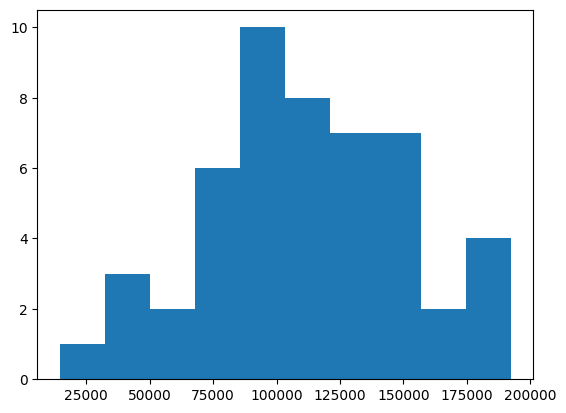

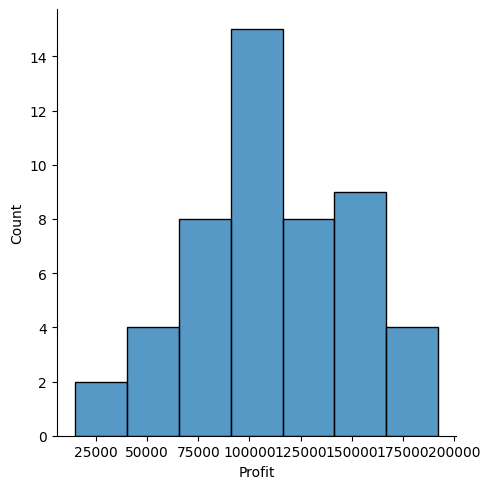

In [9]:
import matplotlib.pyplot as plt
plt.hist(data['Profit'])
sns.displot(data['Profit'])

In [20]:
X=data.iloc[:,[0,1,2,4,5,6]]
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [18]:
Y=data.iloc[:,3]
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200)

In [23]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
5,131876.90,99814.71,362861.36,0,0,1
2,153441.51,101145.55,407934.54,0,1,0
46,1315.46,115816.21,297114.46,0,1,0
30,61994.48,115641.28,91131.24,0,1,0
34,46426.07,157693.92,210797.67,1,0,0


In [24]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
31,61136.38,152701.92,88218.23,0,0,1
28,66051.52,182645.56,118148.20,0,1,0
20,76253.86,113867.30,298664.47,1,0,0


##**LINEAR REGRESSION**

In [25]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
lreg_pred_ytrain=lreg.predict(x_train)

# Generate Prediction on test set
lreg_pred_ytest = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_pred_ytest - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  154062171.28878224
            Columns  Coefficient Estimate
0         R&D Spend              0.783747
1    Administration             -0.016394
2   Marketing Spend              0.024145
3  State_California           1261.331311
4     State_Florida           -308.327264
5    State_New York           -953.004047


In [26]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,lreg_pred_ytrain)
r2_test=r2_score(y_test,lreg_pred_ytest)
(r2_train,r2_test)

(0.960024485294055, 0.8798449716509686)

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

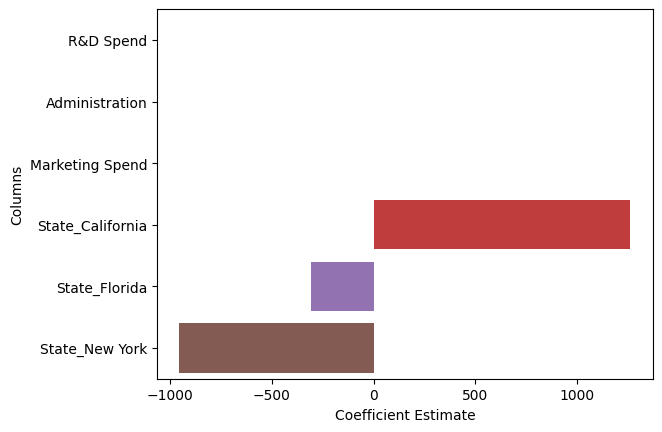

In [27]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate',y='Columns',data=lreg_coefficient,orient='h')

##**RIDGE REGRESSION**

In [28]:
from sklearn.linear_model import Ridge,Lasso
ridgeR = Ridge(alpha = 0.98)
ridgeR.fit(x_train, y_train)
y_ridgepred_train=ridgeR.predict(x_train)
y_ridgepred_test = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_ridgepred_test - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

153364898.62993318
            Columns  Coefficient Estimate
0         R&D Spend              0.783692
1    Administration             -0.016298
2   Marketing Spend              0.024144
3  State_California           1174.130482
4     State_Florida           -284.959555
5    State_New York           -889.170927


In [29]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,y_ridgepred_train)
r2_test=r2_score(y_test,y_ridgepred_test)
(r2_train,r2_test)

(0.9600219789984902, 0.8803887833822338)

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

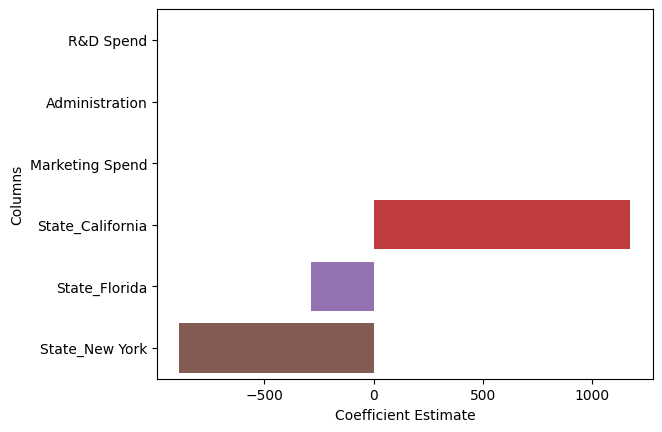

In [30]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate',y='Columns',data=ridge_coefficient,orient='h')

##**LASSO REGRESSION**

In [31]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0.0001)
lasso.fit(x_train, y_train)
lasso_pred_ytrain=lasso.predict(x_train)
lasso_pred_ytest = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((lasso_pred_ytest - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 154062170.00458968
            Columns  Coefficient Estimate
0         R&D Spend              0.783747
1    Administration             -0.016394
2   Marketing Spend              0.024145
3  State_California           2009.911004
4     State_Florida            440.252315
5    State_New York           -204.423959


In [32]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,lasso_pred_ytrain)
r2_test=r2_score(y_test,lasso_pred_ytest)
(r2_train,r2_test)

(0.9600244852940549, 0.8798449726525266)

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

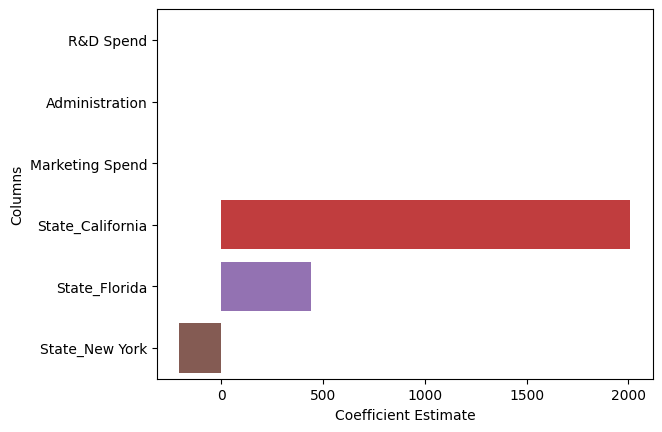

In [33]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate',y='Columns',data=lasso_coeff,orient='h')